# Networks B 
---------------------------------------------

In [5]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *
import numpy.linalg
from IPython.display import display
from IPython.core.display import HTML
from notebook.nbextensions import enable_nbextension 
%matplotlib inline

print('The libraries loaded successfully')

The libraries loaded successfully


This chapter explains continuous-time Markov chains and queuing networks.

## Continuous-Time Markov Chains

Consider the Markov chain with the state transition rates shown in the figure below:

![title](Figs/MC0.pdf)

We simulate the Markov chain, plot the trajectory X[t], and the fraction of time in the different states.

Note that the fractions of time converge.  Is this the case for any continuous-time Markov chain?

In [6]:
def dummy(Td):
    global T
    T = float(Td)

Td = widgets.Dropdown(options=['1', '2', '3', '4','5','6','7','8'],value='3',description='T',disabled=False)

z = widgets.interactive(dummy, Td = Td) 
display(z)

interactive(children=(Dropdown(description='T', index=2, options=('1', '2', '3', '4', '5', '6', '7', '8'), val…

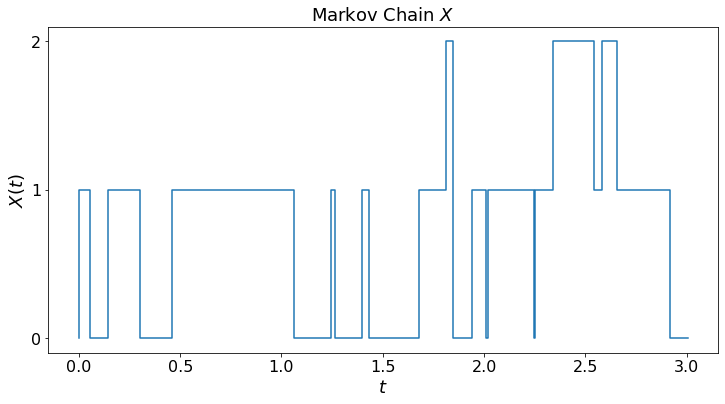

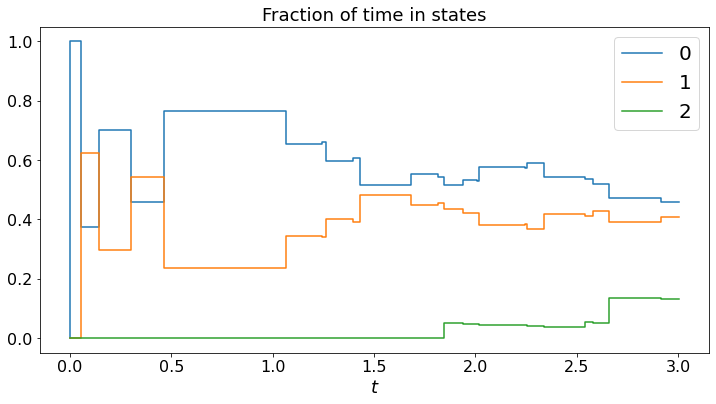

In [7]:
matplotlib.rcParams.update(params)

def discreteRV(x,p): # here x = [x[0],...,x[K-1]], p = [p[0], ..., p[K-1]]
    # returns a random value equal to x[k] with probability p[k]
    z = 0
    K = len(x)
    P = np.zeros(K)
    for k in range(K):
        P[k] = sum(p[:k]) # P[0] = p[0], p[1] = p[1], P[2] = p[0] + p[1], ..., P[K-1] = p[0] + ... + p[K-1] = 1
    U = np.random.uniform(0,1) # here is our uniform RV
    for k in range(1,K):
        found = False
        if U < P[k]:
            z = x[k-1]
            found = True
            break
    if not found:
        z = x[K-1]
    return z

def MC_demo(T): # T = 'real' simulation time; 
    global jump_times, states, M
    Q=np.array([[-6,6,0],[7,-10,3],[2,5,-7]])
    X0 = 0
    M = len(Q) # number of states
    x = np.arange(M) # set of states
    p = np.zeros(M)
    jump_times = [0] # list of jump times
    states = [X0] # initial state
    time = 0
    while time < T:
        state = states[-1] # current state
        rate = - Q[state,state] # rate of holding time of current state
        time += np.random.exponential(1/rate) # add holding time of current state
        for i in range(M):
            if i == state:
                p[i] = 0
            else:
                p[i] = Q[state,i]/rate
        p = list(p)
        next_state = discreteRV(x,p)
        jump_times.append(time)
        states.append(next_state)
    labels = [str(item) for item in x]        
    plt.step(jump_times,states)
    plt.yticks(x, labels)
    plt.ylabel("$X(t)$")
    plt.xlabel("$t$")
    plt.title("Markov Chain $X$")
    plt.show()
    
    N = len(states)
    total_times = np.zeros([M,N])
    average_times = np.zeros([M,N])
    for n in range(1,N):
        state = states[n-1]
        for i in range(M):
            total_times[i,n] = total_times[i,n-1] + (jump_times[n] - jump_times[n-1])*(state == i)
            average_times[i,n] += total_times[i,n]/jump_times[n]
    for i in range(M):
        plt.step(jump_times,average_times[i,:],label=str(x[i]))
    plt.xlabel("$t$")
    plt.title("Fraction of time in states")
    plt.legend()
    plt.show()
        
MC_demo(T)

For this Markov chain, we can calculate the average time in the different states.